In [ ]:
import pandas as pd
data_path = pd.read_csv("/content/Book1.csv")

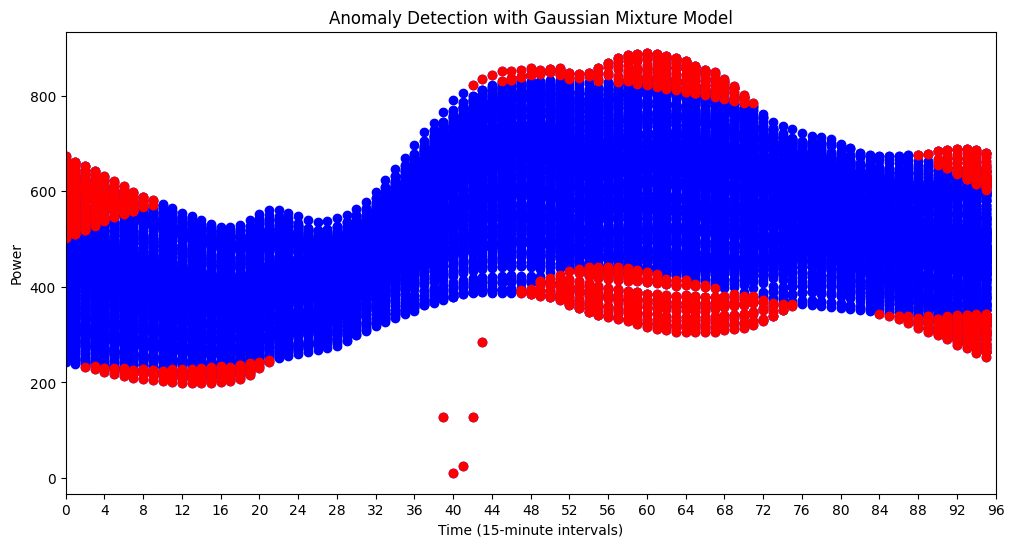

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Read in the data from a CSV file
data = pd.read_csv("/content/Book1.csv")

# Convert the date and time columns to a datetime object
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

# Create a new column with the time in hours
data['time_hours'] = data['datetime'].dt.hour + data['datetime'].dt.minute/60

# Create a new column with the time in 15-minute intervals
data['time_15min'] = (data['datetime'].dt.hour * 4) + (data['datetime'].dt.minute // 15)

# Extract the features to be used for anomaly detection
X = data[['time_15min', 'power']]

# Fit a Gaussian mixture model with 2 components
gmm = GaussianMixture(n_components=2).fit(X)

# Get the probability densities for each data point
densities = gmm.score_samples(X)

# Set the threshold for anomaly detection
threshold = np.percentile(densities, 5)

# Identify the anomalies
anomalies = X[densities < threshold]

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the data with anomalies highlighted in red
plt.scatter(X['time_15min'], X['power'], color='blue')
plt.scatter(anomalies['time_15min'], anomalies['power'], color='red')
plt.xlabel('Time (15-minute intervals)')
plt.ylabel('Power')
plt.title('Anomaly Detection with Gaussian Mixture Model')
plt.xlim(0, 96)  # Set the x-axis limits to 0-96 (24 hours in 15-minute intervals)
plt.xticks(np.arange(0, 97, 4))  # Set the x-axis ticks to 4-hour intervals
plt.show()


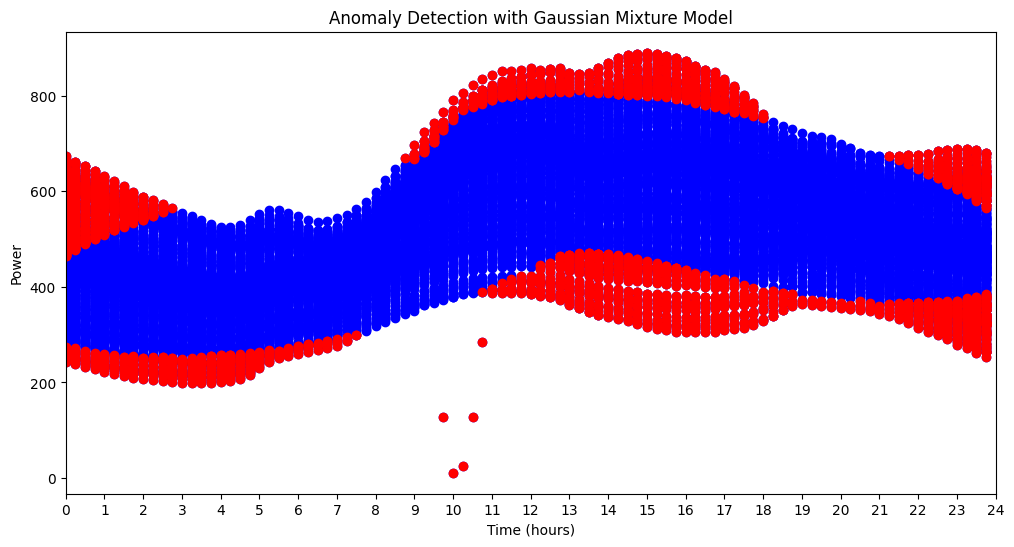

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Read in the data from a CSV file
data = pd.read_csv("/content/Book1.csv")

# Convert the date and time columns to a datetime object
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

# Create a new column with the time in hours
data['time_hours'] = data['datetime'].dt.hour + data['datetime'].dt.minute/60

# Extract the features to be used for anomaly detection
X = data[['time_hours', 'power']]

# Fit a Gaussian mixture model with 2 components
gmm = GaussianMixture(n_components=2).fit(X)

# Get the probability densities for each data point
densities = gmm.score_samples(X)

# Set the threshold for anomaly detection
threshold = np.percentile(densities, 10)

# Identify the anomalies
anomalies = X[densities < threshold]

# Set the figure size to (12, 6)
plt.figure(figsize=(12, 6))

# Plot the data with anomalies highlighted in red
plt.scatter(X['time_hours'], X['power'], color='blue')
plt.scatter(anomalies['time_hours'], anomalies['power'], color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Power')
plt.title('Anomaly Detection with Gaussian Mixture Model')
plt.xlim(0, 24)  # Set the x-axis limits to 0-24 hours
plt.xticks(np.arange(0, 25, 1))  # Set the x-axis ticks to 1-hour intervals
plt.show()